In [78]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import random
import sys
BOLD = '\033[1m'
END = '\033[0m'

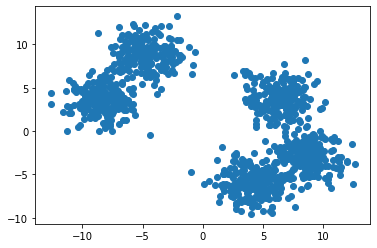

In [71]:
# creat blobs
X,y = make_blobs(n_samples=1000, centers=5, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1])

In [4]:
X.shape

(500, 2)

In [72]:
# split data in training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

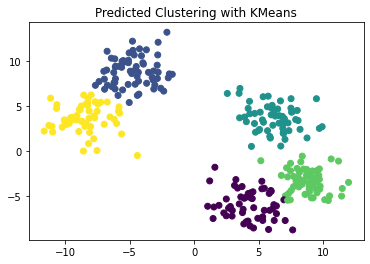

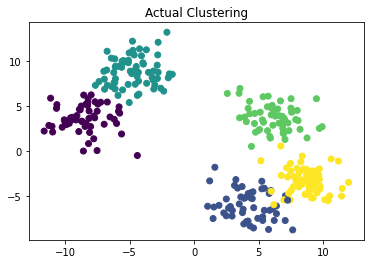

In [73]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(X_train)
y_pred_kmeans = kmeans_model.predict(X_test)
plt.figure(1)
plt.subplot(111)
plt.title("Predicted Clustering with KMeans")
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_kmeans, cmap='viridis')
plt.figure(2)
plt.subplot(111)
plt.title("Actual Clustering")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')

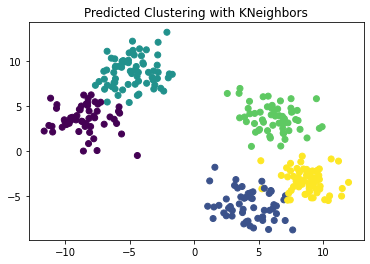

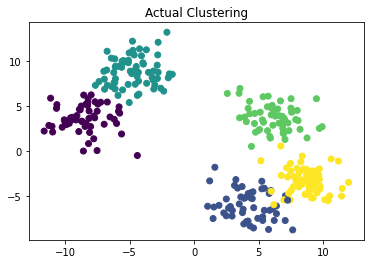

In [75]:
kneighbors_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski')
kneighbors_model.fit(X_train, y_train)
y_pred_kneighbors = kneighbors_model.predict(X_test)
plt.figure(1)
plt.subplot(111)
plt.title("Predicted Clustering with KNeighbors")
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_kneighbors, cmap='viridis')
plt.figure(2)
plt.subplot(111)
plt.title("Actual Clustering")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='viridis')

In [82]:
ari_kmeans = adjusted_rand_score(y_test, y_pred_kmeans)
nmi_kmeans = normalized_mutual_info_score(y_test, y_pred_kmeans)
ari_kneighbors = adjusted_rand_score(y_test, y_pred_kneighbors)
nmi_kneighbors = normalized_mutual_info_score(y_test, y_pred_kneighbors)
print(f"{BOLD}KMeans{END}")
print(f"Clustering with Adjustend Rand Score (ARI): {ari_kmeans}")
print(f"Clustering with Normalized Mutual Information (NMI): {nmi_kmeans}")
print("\n")
print(f"{BOLD}KNeighbors{END}")
print(f"Clustering with Adjustend Rand Score (ARI): {ari_kneighbors}")
print(f"Clustering with Normalized Mutual Information (NMI): {nmi_kneighbors}")

KMeans
Clustering with Adjustend Rand Score (ARI): 0.9516013352007109
Clustering with Normalized Mutual Information (NMI): 0.9465634510901154


KNeighbors
Clustering with Adjustend Rand Score (ARI): 0.9430250487777221
Clustering with Normalized Mutual Information (NMI): 0.935913565481735


## Adjusted Rand Index (ARI)
Der ARI vergleicht die Ähnlichkeit zwischen den echten Klassenlabels und den vorhergesagten Clustern. Er berücksichtigt auch die Zufälligkeit, die bei der Klassen-Cluster-Zuordnung auftreten kann.
Der ARI nimmt Werte zwischen -0.5 und 1 an, wobei der Wert nahe 0.0 ist, wenn zufällig klassifiziert wird und 1.0 für eine perfekte Klassifikation steht.

$\begin{aligned}
    E[RI] &= \frac{\text{Number of pairs in same cluster (actual)} \times \text{Number of pairs in same cluster(predicted)}}{\text{Total number of possible pairs}} \\\\
    &= \frac{\sum_i{\binom{a_i}{2}} \times \sum_j{\binom{b_j}{2}}}{\binom{n}{2}}
\end{aligned}$

$\begin{aligned}
    ARI &= \frac{\text{Number of pair-wise true positive prediction - E[RI]}}{\text{Average number of pairs in same cluster for actual and predicted - E[RI]}} \\\\
    &= \frac{\sum_{ij}{\binom{n_{ij}}{2}}-E[RI]}{\frac{1}{2}\sum_i{\binom{a_i}{2}} \times \sum_j{\binom{b_j}{2}}-E[RI]}
\end{aligned}$


## Normalized Mutual Information (NMI)
Die NMI misst die Ähnlichkeit zwischen den wahren Klassen und den vorhergesagten Clustern unter Berücksichtigung der Datenverteilung. Sie berücksichtigt sowohl Informationsgehalt der Clustering-Ergebnisse als auch dei Klassenverteilung